**What are the most demanded skills for the top 3 most popular data roles?**

Methodology 

    1. Clean-up skill column
    2. Calculate skill count based on job_title_short
    3. Calculate skill percentage
    4. plot final findings



In [89]:
# Install libraries
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data CleanUp
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [74]:
df_US = df[df['job_country'] == 'United States']

df_US 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [78]:
df_skills = df_US.explode('job_skills') 

print(df_skills) 


             job_title_short  \
0       Senior Data Engineer   
3              Data Engineer   
3              Data Engineer   
3              Data Engineer   
3              Data Engineer   
...                      ...   
785692        Data Scientist   
785703          Data Analyst   
785705          Data Analyst   
785705          Data Analyst   
785705          Data Analyst   

                                                job_title     job_location  \
0       Senior Clinical Data Engineer / Principal Clin...    Watertown, CT   
3       LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...  San Antonio, TX   
3       LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...  San Antonio, TX   
3       LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...  San Antonio, TX   
3       LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...  San Antonio, TX   
...                                                   ...              ...   
785692               Data Scientist- Hybrid Work Location       Dayto

In [79]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count') 

print(df_skills_count)

     job_skills            job_title_short  skill_count
0       airflow           Business Analyst           38
1       airflow             Cloud Engineer           27
2       airflow               Data Analyst          387
3       airflow              Data Engineer         4716
4       airflow             Data Scientist         1166
...         ...                        ...          ...
1865       zoom  Machine Learning Engineer            5
1866       zoom        Senior Data Analyst           50
1867       zoom       Senior Data Engineer           30
1868       zoom      Senior Data Scientist           25
1869       zoom          Software Engineer           16

[1870 rows x 3 columns]


In [80]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')  

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)  # Sort correctly

print(df_skills_count)

     job_skills            job_title_short  skill_count
1209     python             Data Scientist        42379
1521        sql               Data Analyst        34452
1523        sql             Data Scientist        30034
455       excel               Data Analyst        27519
1243          r             Data Scientist        26022
...         ...                        ...          ...
245     clojure          Software Engineer            1
1738     vb.net      Senior Data Scientist            1
530     fortran  Machine Learning Engineer            1
1116    planner             Cloud Engineer            1
960        nltk       Senior Data Engineer            1

[1870 rows x 3 columns]


In [81]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [83]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='job_total')

In [84]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['job_total']

df_skills_perc



,job_skills,job_title_short,skill_count,job_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


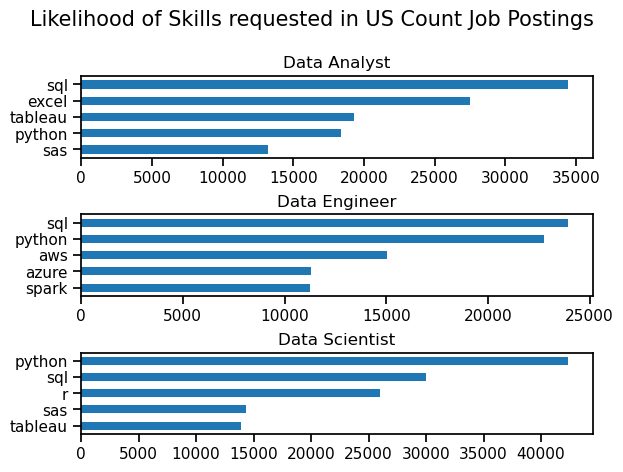

In [97]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)

    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False) 

fig.suptitle('Likelihood of Skills requested in US Count Job Postings', fontsize = 15)
fig.tight_layout(h_pad=0.5) #fix the overlap
plt.show()


In [85]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1
